In [260]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import math
import utils
from collections import deque
import random
import seaborn as sns
from sklearn import preprocessing
from keras.layers import Dense, Dropout, LSTM, GRU, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import time
import data_manipulator
import create_model
import data_reader
import finance_calculator
import latex

sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
seq_col_brew = sns.color_palette("flag_r", 4)
sns.set_palette(seq_col_brew)
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 13
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rcParams['savefig.dpi'] = 1200

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


tf.keras.utils.set_random_seed(2) # relu

#settings
%reload_ext autoreload
%autoreload 3
%config InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'

In [126]:
# load back history data
SEQ_LEN = 60  # how long of a preceeding sequence to collect for RNN
ASSET_TO_PREDICT = 'rx1'                  #--- VAR CHANGE
with open('models/last_run_model_name.txt') as f:
    last_model_name = f.readline()
    print(last_model_name)
model_name = last_model_name        #--- VAR CHANGE
model_load = keras.models.load_model(f'models/{model_name}.hdf5')
history_load = np.load(f'history/{model_name}.npy',allow_pickle='TRUE').item()

01.21.2155-rx1-60-1-lstm-sigmoid


In [261]:
fig1, axs1, fig2, axs2 = utils.plot_history_data(history_load)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x294ff67a0> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 576x360 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 576x360 with 1 Axes>

In [128]:
# CREDIT DATA
credit_df = pd.DataFrame() # begin empty
rx1, ty1, ik1, oe1, du1 = data_reader.credit()
credit_df['rx1'] = rx1['RX1 Comdty']
# credit_df['du1'] = du1['DU1 Comdty']

# CRYPTO DATA
ratios = ["BTC-USD", "LTC-USD", "BCH-USD", "ETH-USD"]
crypto_df = data_reader.crypto(ratios)

# set dataset                              
dataset_df = credit_df                      # --VAR CHANGE 

val_df = data_manipulator.splitter(dataset_df, cutoff=0.10)[1]

df_rp = utils.getReturnAndPred_sigmoidModel(val_df, SEQ_LEN+1, ASSET_TO_PREDICT, model_load)

[0.5059911]
[0.5089445]
[0.5063784]
[0.49097505]
[0.46149102]
[0.46253094]
[0.4822772]
[0.47736746]
[0.47415072]
[0.4913857]
[0.5069762]
[0.4967008]
[0.4763899]
[0.47134796]
[0.4822681]
[0.48159623]
[0.48455235]
[0.48255438]
[0.4793744]
[0.4841019]
[0.49117824]
[0.49355522]
[0.5037818]
[0.5151933]
[0.5197147]
[0.50380266]
[0.50888777]
[0.5202464]
[0.5253292]
[0.4993145]
[0.47035664]
[0.48025215]
[0.45047855]
[0.48588476]
[0.5096657]
[0.5157379]
[0.5228899]
[0.5331338]
[0.53724855]
[0.5041151]
[0.5002387]
[0.5013727]
[0.50389904]
[0.50290275]
[0.4514514]
[0.4603285]
[0.47191542]
[0.47476715]
[0.47805277]
[0.4819776]
[0.48537344]
[0.5008993]
[0.52885056]
[0.5478625]
[0.54884267]
[0.5559345]
[0.5113554]
[0.47596973]
[0.4752259]
[0.47548708]
[0.49071568]
[0.48786068]
[0.49468333]
[0.49101135]
[0.48497048]
[0.48518443]
[0.49622318]
[0.5018332]
[0.5015368]
[0.5051227]
[0.50754315]
[0.5116547]
[0.51261437]
[0.511658]
[0.5203038]
[0.52936524]
[0.5229181]
[0.50018656]
[0.49553427]
[0.49404946]


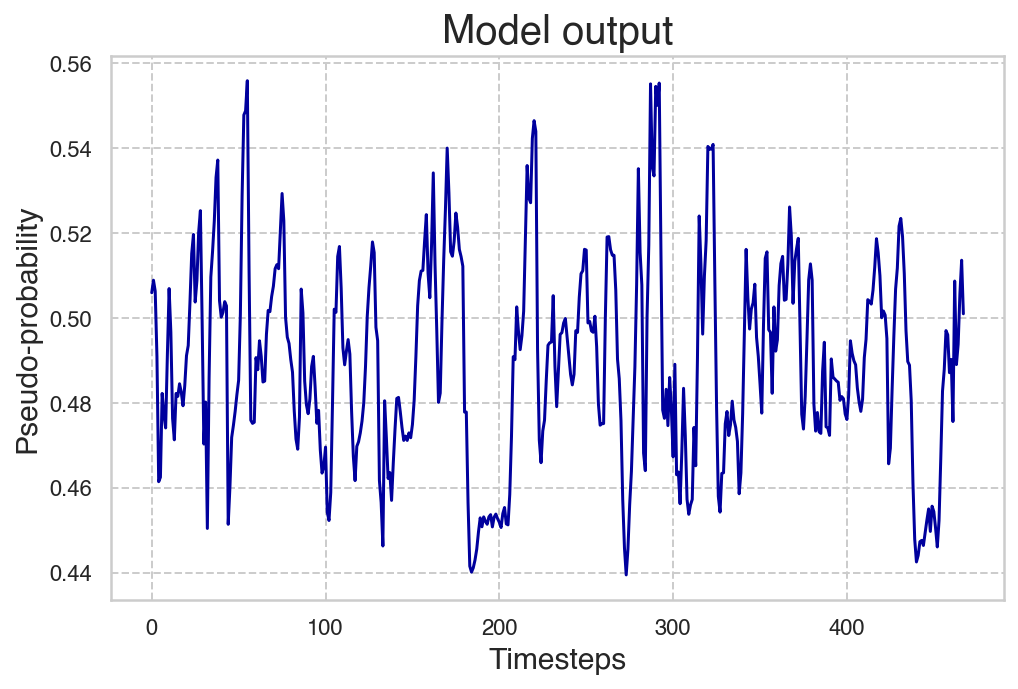

In [253]:
fig, axs = plt.subplots(1,1, figsize=(8,5))
fig = plt.plot(df_rp['probability_up'], linewidth='1.5')
axs = plt.title('Model output')
axs = plt.ylabel('Pseudo-probability')
axs = plt.xlabel('Timesteps')

Mean of 50 first predictions 0.49236077
TP: 91
FP: 122
TN: 137
FN: 118
Precision: 42.72%
Recall: 43.54%
Correlation: 42.83%


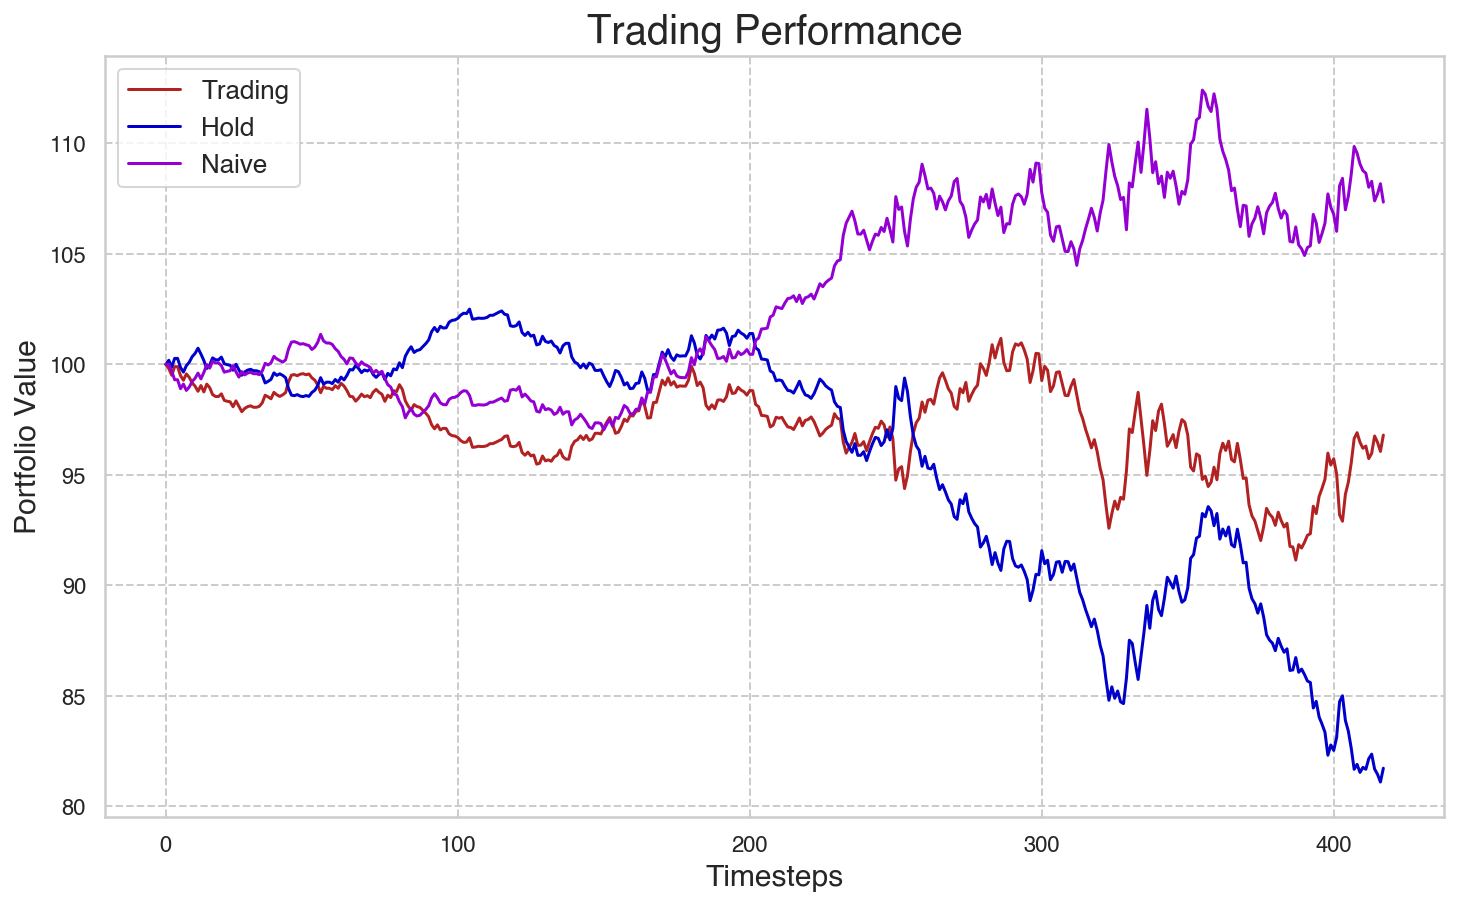

In [247]:
n = 50                       #--- VAR CHANGE
first_n_predictions = df_rp.loc[0:n, 'probability_up']
mean = np.mean(first_n_predictions)
print(f'Mean of {n} first predictions', mean)

treshhold = mean # 0 = always short, 1 = always long. mean ~ 50/50 short/long
copy_df = df_rp[n:].reset_index(drop=True)
portfolio_value_trading = finance_calculator.portfolio_value_trading(copy_df, treshhold)
portfolio_value_hold = finance_calculator.portfolio_value_hold(copy_df)

portfolio_value_naive = finance_calculator.portfolio_value_naive(copy_df)

fig, axs = plt.subplots(1,1, figsize=(12,7))
fig = plt.plot(portfolio_value_trading, color='firebrick', linestyle='-')
fig = plt.plot(portfolio_value_hold, color='mediumblue', linestyle='-')
fig = plt.plot(portfolio_value_naive, color='darkviolet', linestyle='-')
axs1 = plt.title('Trading Performance', )
axs1 = plt.ylabel('Portfolio Value')
axs1 = plt.xlabel('Timesteps')
axs1 = plt.legend(['Trading', 'Hold', 'Naive'], loc='upper left')

tp, fp, tn, fn = finance_calculator.confusion_stats_trading(df_rp, treshhold)
print(f'TP: {tp}'); print(f'FP: {fp}'); print(f'TN: {tn}'); print(f'FN: {fn}')

precision = tp / (tp + fp) #of the positive predictions, how many are correct?
recall = tp / (tp + fn) #how many of the positives did we recall?
print("Precision: {:5.2f}%".format(100 * precision))
print("Recall: {:5.2f}%".format(100 * recall))

correlation = np.corrcoef(portfolio_value_trading, portfolio_value_hold)[1][0]
print("Correlation: {:5.2f}%".format(100 * correlation))

In [255]:
returns_trading = finance_calculator.daily_returns(portfolio_value_trading)
sharpe_trading = finance_calculator.sharpe_ratio(returns_trading, 1440*365, 0.02)
sortino_trading = finance_calculator.sortino_ratio(returns_trading, 1440*365, 0.02)
print("Sharpe-ratio, trading: {:5.2f}".format(sharpe_trading))
print("Sortino-ratio, trading: {:5.2f}".format(sortino_trading))
gross_return_trading = finance_calculator.gross_return(portfolio_value_trading)
print("Gross return, trading: {:5.2f}%".format(100 * gross_return_trading))

print('')

returns_hold = finance_calculator.daily_returns(portfolio_value_hold)
sharpe_hold = finance_calculator.sharpe_ratio(returns_hold, 1440*365, 0.02)
sortino_hold = finance_calculator.sortino_ratio(returns_hold, 1440*365, 0.02)
print("Sharpe-ratio, hold: {:5.2f}".format(sharpe_hold))
print("Sortino-ratio, hold: {:5.2f}".format(sortino_hold))
gross_return_hold = finance_calculator.gross_return(portfolio_value_hold)
print("Gross return, hold: {:5.2f}%".format(100 * gross_return_hold))

print('')

returns_naive = finance_calculator.daily_returns(portfolio_value_naive)
sharpe_naive = finance_calculator.sharpe_ratio(returns_naive, 1440*365, 0.02)
sortino_naive = finance_calculator.sortino_ratio(returns_naive, 1440*365, 0.02)
print("Sharpe-ratio, naive: {:5.2f}".format(sharpe_naive))
print("Sortino-ratio, naive: {:5.2f}".format(sortino_naive))
gross_return_naive = finance_calculator.gross_return(portfolio_value_naive)
print("Gross return, naive: {:5.2f}%".format(100 * gross_return_naive))



Sharpe-ratio, trading: -9.57
Sortino-ratio, trading: -13.72
Gross return, trading: -3.20%

Sharpe-ratio, hold: -69.10
Sortino-ratio, hold: -108.76
Gross return, hold: -18.27%

Sharpe-ratio, naive: 26.60
Sortino-ratio, naive: 42.32
Gross return, naive:  7.34%
